#### Goal:
### Explore the Netflix Movies & TV Shows dataset, clean and preprocess data, perform exploratory data analysis, visualize trends, and gain insights using NumPy, Pandas, Matplotlib, and Seaborn.
## 1. Why This Project?

#### Learn data cleaning and preprocessing using Pandas.

#### Use NumPy for statistical analysis such as counts, averages, and distributions.

#### Visualize trends and patterns using Matplotlib and Seaborn.

#### Understand content characteristics like genres, ratings, release years, and country-wise distribution.

#### Gain insights from a real-world streaming dataset to practice exploratory data analysis and reporting.

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




### 3. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv('netflix_titles.csv')

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 4.Explore data


In [4]:
# Check shape of dataset
print("Dataset Shape:", df.shape)

# Check column names
print("Columns:", df.columns)

# Summary statistics
df.describe(include='all')

# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types
print("Data Types:\n", df.dtypes)

# Check unique values in categorical columns
print("Unique Values:\n", df.nunique())


Dataset Shape: (8807, 12)
Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
Unique Values:
 show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17

Dataset Overview

Rows / Columns: 8807 / 12

Key columns: type, title, director, cast, country, date_added, release_year, rating, duration, listed_in

Missing Values

Director: 2634 missing

Cast: 825 missing

Country: 831 missing

Date Added / Rating / Duration: very few missing

### 5.Data Cleaning

In [6]:
# Import libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("netflix_titles.csv")  # Replace with your file path

# 1. Drop duplicate rows if any
df = df.drop_duplicates()

# 2. Fill missing values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

# 3. Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 4. Strip whitespace from string columns
df['title'] = df['title'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['description'] = df['description'].str.strip()

# 5. Extract main genre from 'listed_in' column
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# 6. Optional: Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 7. Quick check
print("Dataset shape after cleaning:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())
print("Sample cleaned data:\n", df.head())


Dataset shape after cleaning: (8807, 13)
Missing values after cleaning:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
main_genre       0
dtype: int64
Sample cleaned data:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       

Insights:
Rows / Columns: 8807 / 13

Missing Values: Only date_added has 98 missing (~1%)

Content Type: Mix of Movies and TV Shows

Top Countries: USA, India, UK likely produce most content

Ratings: Popular ratings are TV-MA, TV-14, PG-13

Genres: Common genres include Drama, Comedy, Documentary, Action

Directors & Cast: Many unknown; some appear multiple times

Release Years: Mostly recent content, reflecting Netflix originals

Duration & Description: Mostly complete → can analyze lengths and content themes

### 6.Analysis with Numpy and Pandas

In [7]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Data Cleaning (minimal)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# 1. Count of Movies vs TV Shows
type_counts = df['type'].value_counts()
print("Movies vs TV Shows:\n", type_counts)

# 2. Top 5 Countries producing content
top_countries = df['country'].value_counts().head(5)
print("\nTop 5 Countries:\n", top_countries)

# 3. Average release year
avg_year = np.mean(df['release_year'])
print(f"\nAverage Release Year: {avg_year:.0f}")

# 4. Count of titles by main genre
genre_counts = df['main_genre'].value_counts()
print("\nTop 5 Genres:\n", genre_counts.head(5))

# 5. Titles by type and country (like groupby example)
titles_by_country_type = df.groupby(['country', 'type'])['title'].count()
print("\nTitles by Country and Type (sample):\n", titles_by_country_type.head(10))


Movies vs TV Shows:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Top 5 Countries:
 country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64

Average Release Year: 2014

Top 5 Genres:
 main_genre
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
International TV Shows     774
Name: count, dtype: int64

Titles by Country and Type (sample):
 country                                              type   
, France, Algeria                                    Movie       1
, South Korea                                        TV Show     1
Argentina                                            Movie      38
                                                     TV Show    18
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
Argentina, Chile                                     Movie       2
Argentina,

#### Insights
Netflix has more movies (6131) than TV shows (2676).

Top countries producing content: USA, India, UK, Japan; many entries have unknown country.

Average release year is 2014 → most content is relatively recent.

Most popular genres: Dramas, Comedies, Action & Adventure, Documentaries, International TV Shows.

Netflix features both domestic and international content, including co-productions.

Drama and comedy dominate, but there is good variety across genres and countries.

### 7.Visualization with Matplotlib

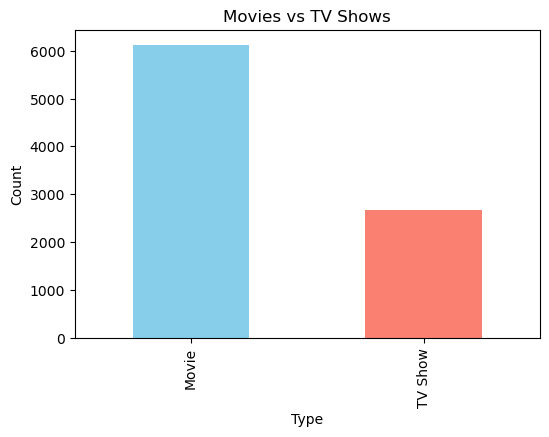

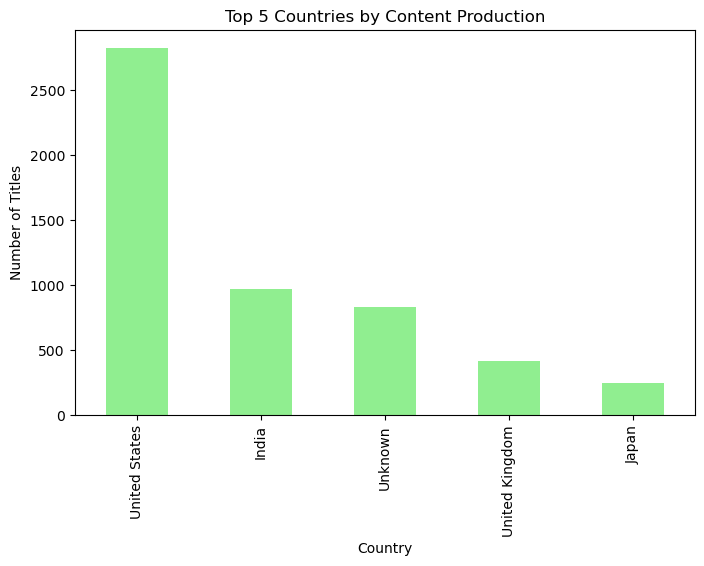

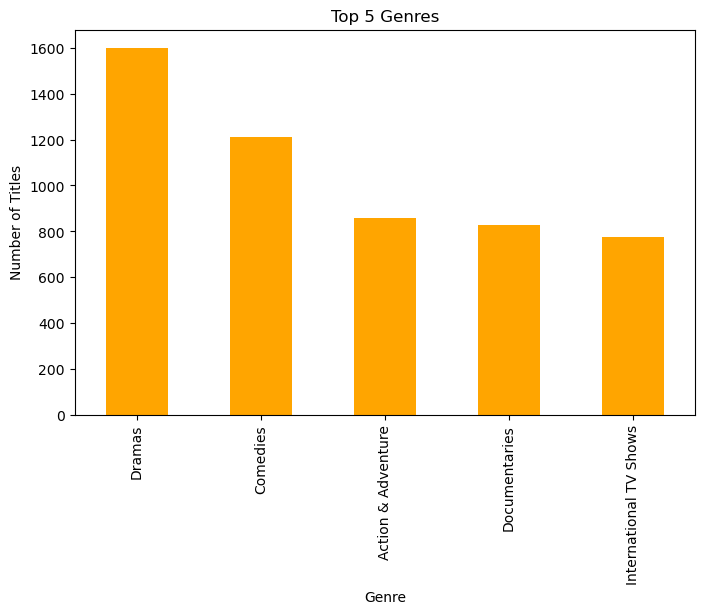

In [9]:
import matplotlib.pyplot as plt

# -------------------------
# 1. Movies vs TV Shows
# -------------------------
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# -------------------------
# 2. Top 5 Countries
# -------------------------
top_countries = df['country'].value_counts().head(5)
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Countries by Content Production')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

# -------------------------
# 3. Top 5 Genres
# -------------------------
top_genres = df['main_genre'].value_counts().head(5)
plt.figure(figsize=(8,5))
top_genres.plot(kind='bar', color='orange')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.show()


### Insights
Movies dominate: Movies outnumber TV shows by over 2x, showing a strong focus on film content.

U.S. leads content production: The U.S. is the top producer, with India and others trailing far behind.

Dramas are most popular: Dramas top the genre list, followed by comedies and action titles.

Global content mix: Content comes from both Western and Asian countries, reflecting broad international appeal.

# EDA

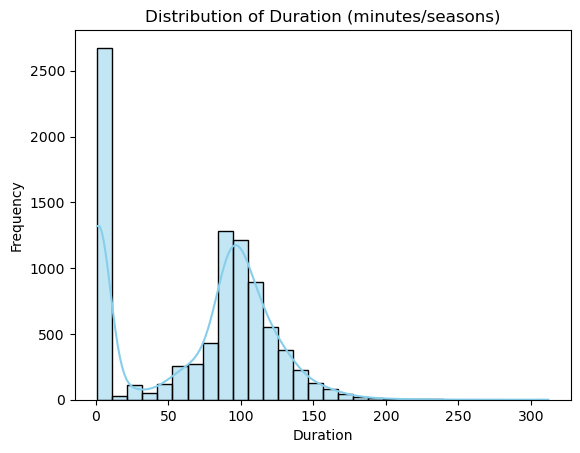

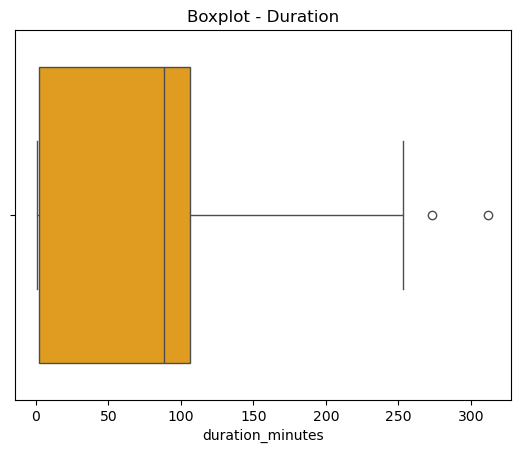

In [3]:
#Univariate Analysis - Numerical Features
# Convert duration to numeric (extract number of minutes or seasons)
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

# Histogram: duration_minutes
sns.histplot(df['duration_minutes'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Duration (minutes/seasons)")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

# Boxplot: duration_minutes
sns.boxplot(x=df['duration_minutes'].dropna(), color='orange')
plt.title("Boxplot - Duration")
plt.show()

C:\Users\chund\AppData\Local\Temp\ipykernel_6564\2987507708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df[df['country'].isin(top_countries)],


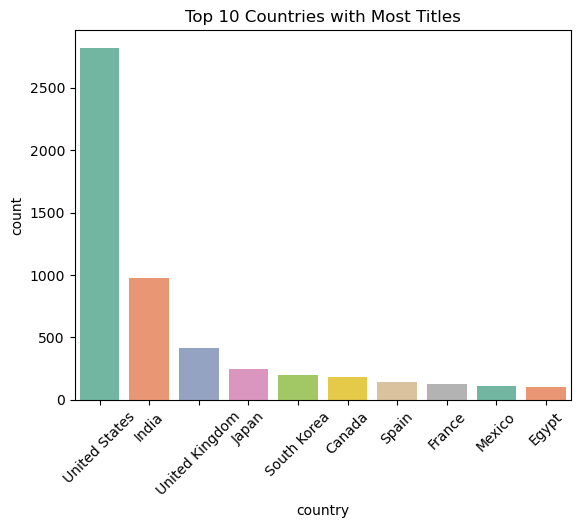

In [5]:
#Univariate Analysis - Categorical Features
# Select only one categorical column (e.g., 'country')
top_countries = df['country'].value_counts().nlargest(10).index

sns.countplot(x='country', data=df[df['country'].isin(top_countries)],
              order=top_countries, palette='Set2')
plt.title("Top 10 Countries with Most Titles")
plt.xticks(rotation=45)
plt.show()



C:\Users\chund\AppData\Local\Temp\ipykernel_6564\2987700860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='duration_minutes', data=df, palette='Set3')


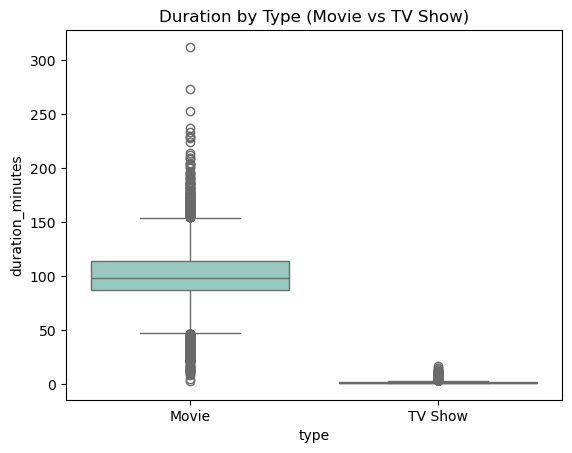

In [6]:
#Bivariate Analysis - Numerical vs Categorical
# Boxplot: Duration by Type
sns.boxplot(x='type', y='duration_minutes', data=df, palette='Set3')
plt.title("Duration by Type (Movie vs TV Show)")
plt.show()


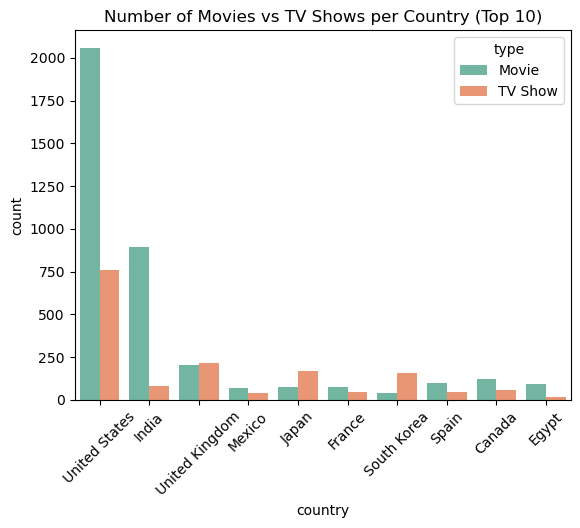

In [7]:
#Bivariate Analysis - Categorical vs Categorical
# Example: count of shows per country by type
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

sns.countplot(x='country', hue='type', data=df_top, palette='Set2')
plt.title("Number of Movies vs TV Shows per Country (Top 10)")
plt.xticks(rotation=45)
plt.show()


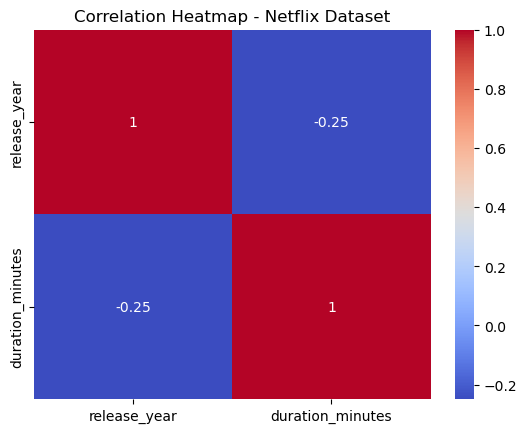

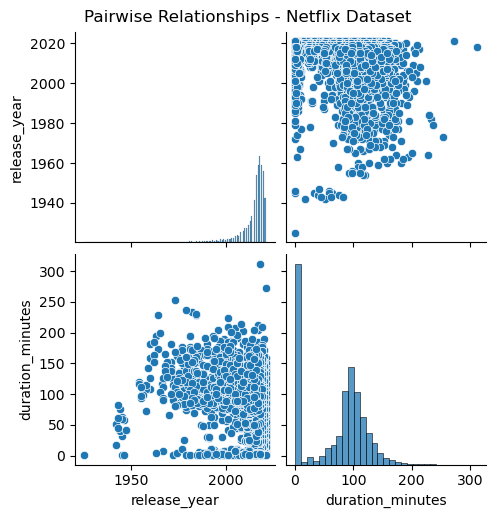

In [8]:
#Correlation and Multivariate Analysis
# Only numeric columns can be correlated
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap - Netflix Dataset")
plt.show()

# Pairplot for numeric features
if len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.suptitle("Pairwise Relationships - Netflix Dataset", y=1.02)
    plt.show()


Number of outliers in Duration: 2


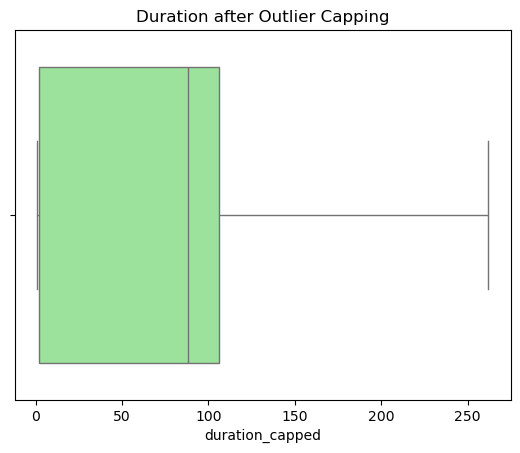

In [9]:
#Outlier Detection using IQR
# Example: duration_minutes
Q1 = df['duration_minutes'].quantile(0.25)
Q3 = df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df[(df['duration_minutes'] < lower) | (df['duration_minutes'] > upper)]
print("Number of outliers in Duration:", len(outliers))

df['duration_capped'] = df['duration_minutes'].clip(lower, upper)

sns.boxplot(x=df['duration_capped'], color='lightgreen')
plt.title("Duration after Outlier Capping")
plt.show()


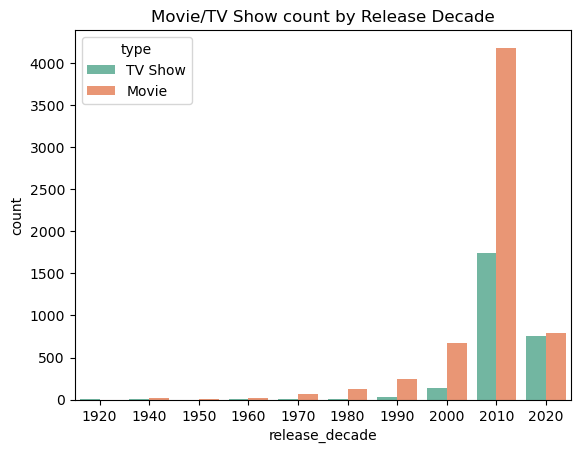

,type,release_year,release_decade,is_recent
0,Movie,2020,2020,1
1,TV Show,2021,2020,1
2,TV Show,2021,2020,1
3,TV Show,2021,2020,1
4,TV Show,2021,2020,1


In [10]:
#Feature Engineering
# Create new features
df['release_decade'] = (df['release_year'] // 10) * 10
df['is_recent'] = (df['release_year'] >= 2018).astype(int)

# Example visualization: type by release_decade
sns.countplot(x='release_decade', hue='type', data=df, palette='Set2')
plt.title("Movie/TV Show count by Release Decade")
plt.show()

df[['type', 'release_year', 'release_decade', 'is_recent']].head()


In [11]:
#Export the Cleaned Data
df.to_csv("Netflix_cleaned.csv", index=False)
print("\nCleaned Netflix data saved as Netflix_cleaned.csv")



Cleaned Netflix data saved as Netflix_cleaned.csv
